In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_csv("FinalDataset.csv",index_col='Month',parse_dates=True)
df.head()

,Football,Basketball
Month,,
2008-01-01,74.58,60.05
2008-02-01,61.26,84.78
2008-03-01,53.75,67.66
2008-04-01,54.00,74.46
2008-05-01,58.84,89.13


checking for football

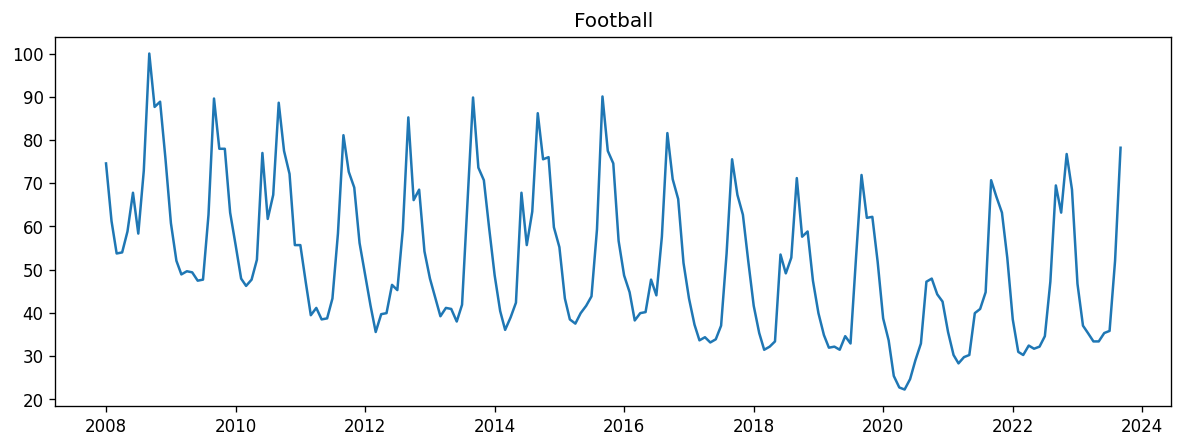

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df['Football'], label='Football')
plt.title('Football')
plt.show()

In [ ]:
result_adf = adfuller(df['Football'])
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
print('Critical Values:', result_adf[4])

# Perform KPSS test
result_kpss = kpss(df['Football'])
print('KPSS Statistic:', result_kpss[0])
print('p-value:', result_kpss[1])
print('Critical Values:', result_kpss[3])

ADF Statistic: -2.2055766758597053
p-value: 0.20422767494719968
Critical Values: {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134}
KPSS Statistic: 1.1985305213192479
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-34-9e692c612791>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(df['Football'])


In [ ]:
if result_adf[1] < 0.05 and result_kpss[1] > 0.05:
    print('The time series is stationary')
elif result_adf[1] >= 0.05 and result_kpss[1] < 0.05:
    print('The time series is not stationary')
elif result_adf[1] < 0.05 and result_kpss[1] < 0.05:
    if result_adf[0] < result_kpss[0]:
        print('The time series is difference-stationary')
    else:
        print('The time series is trend-stationary')
else:
    print('The test results are inconclusive')

The time series is not stationary


In [ ]:
print(df.describe())

         Football  Basketball
count  189.000000  189.000000
mean    51.809630   62.034233
std     16.728821   14.726623
min     22.280000   33.970000
25%     38.500000   51.630000
50%     47.940000   61.140000
75%     63.200000   71.470000
max    100.000000  100.000000


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

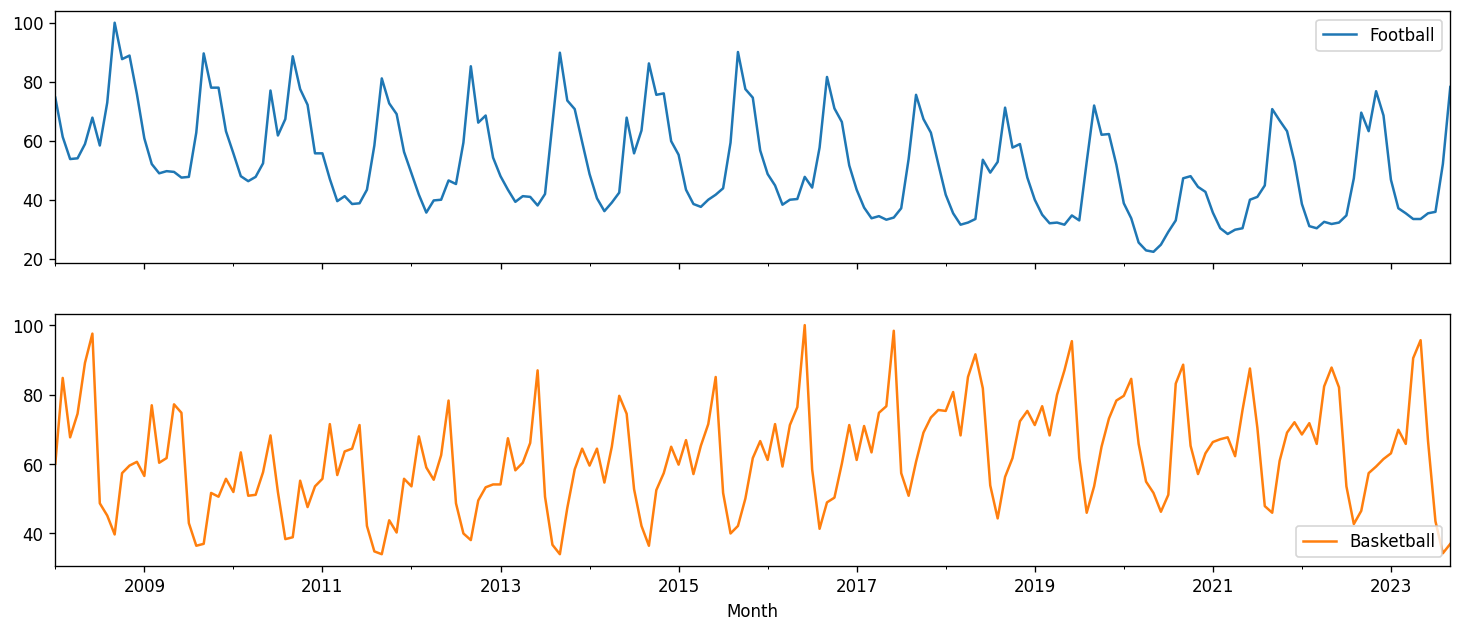

In [ ]:
df.plot(subplots=True, figsize=(15,6))
plt.show()

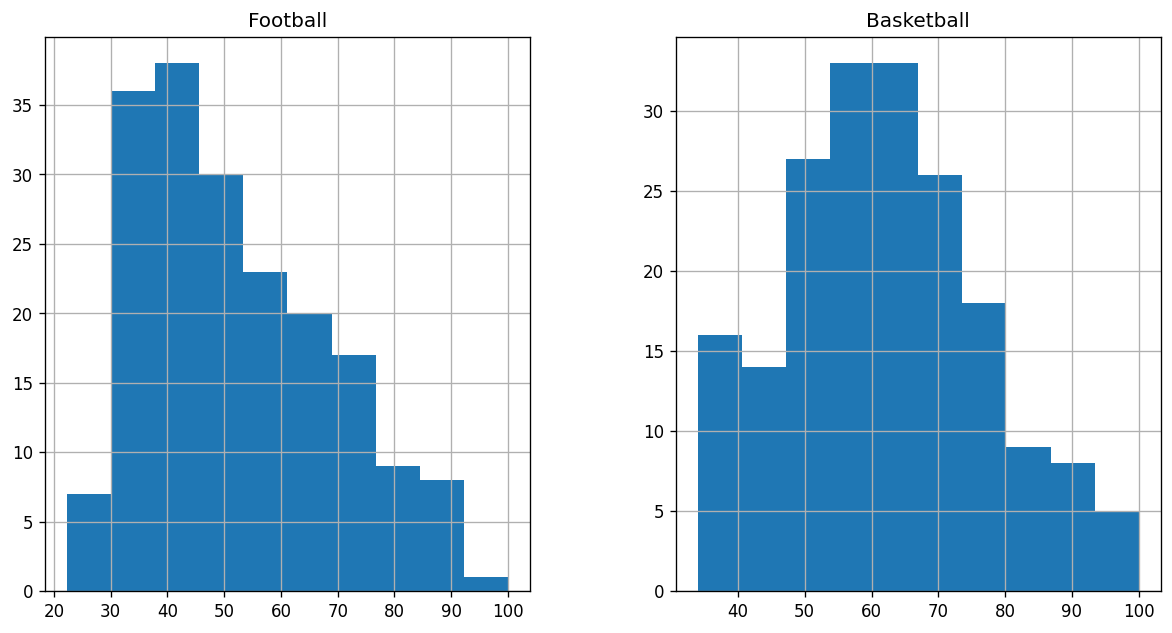

In [ ]:
df.hist( )
plt.show()

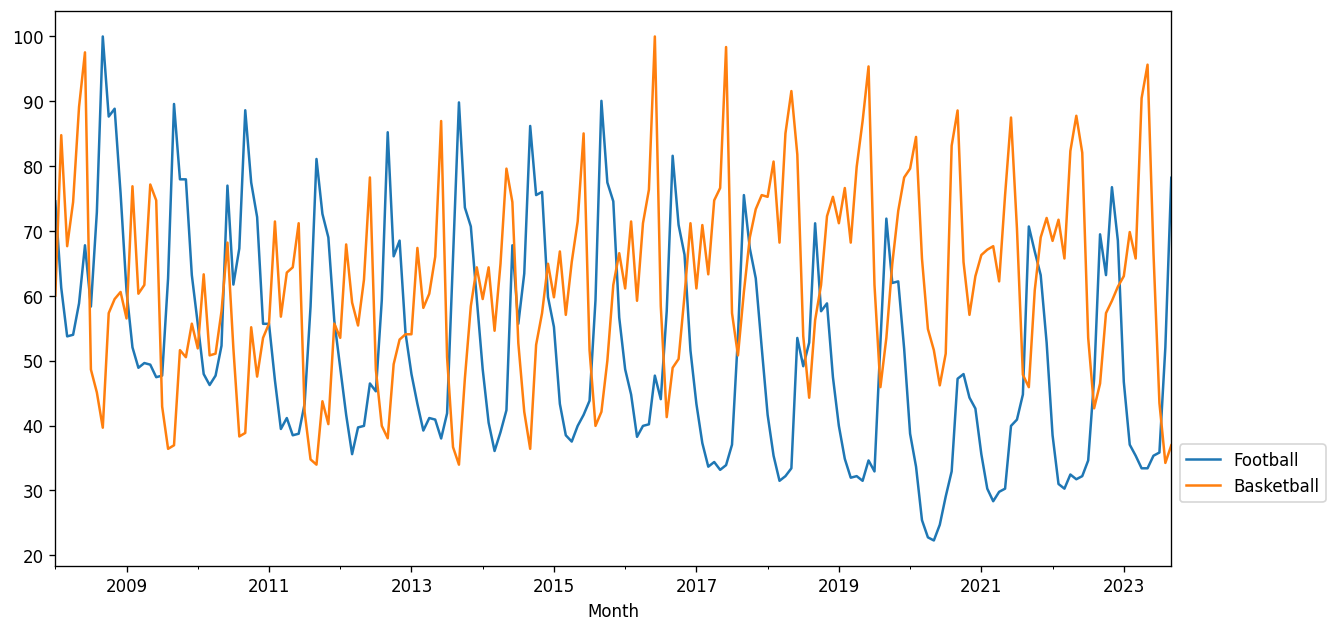

In [ ]:
ax=df.plot()
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3,bbox_to_anchor=(1.0,0.1))

In [ ]:
!pip install calplot

(<Figure size 1200x3264 with 16 Axes>,
 array([<Axes: ylabel='2008'>, <Axes: ylabel='2009'>,
        <Axes: ylabel='2010'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2012'>, <Axes: ylabel='2013'>,
        <Axes: ylabel='2014'>, <Axes: ylabel='2015'>,
        <Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

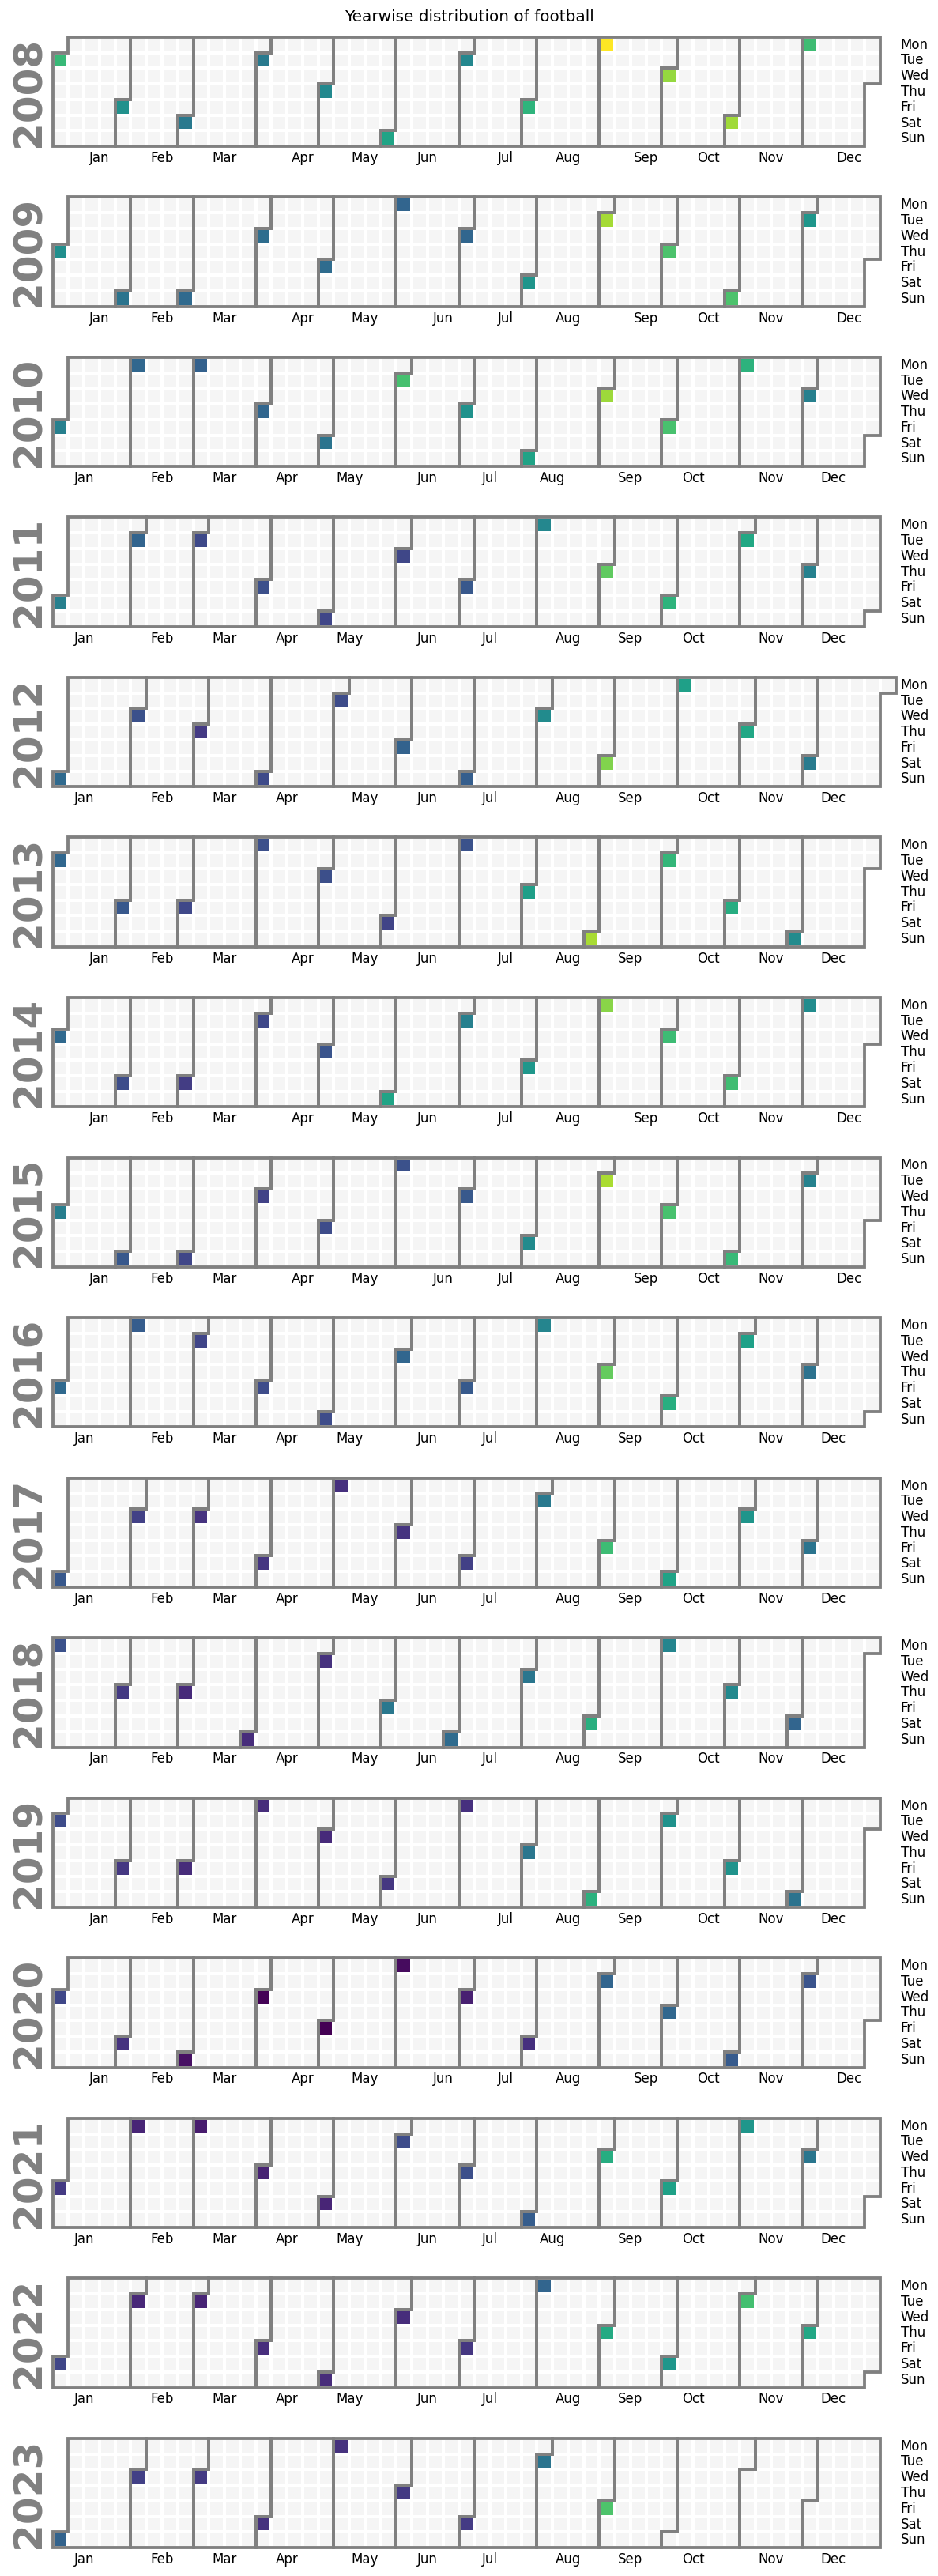

In [ ]:
import calplot
calplot.calplot(df['Football'],linewidth = 2.3,colorbar=False,suptitle='Yearwise distribution of football')

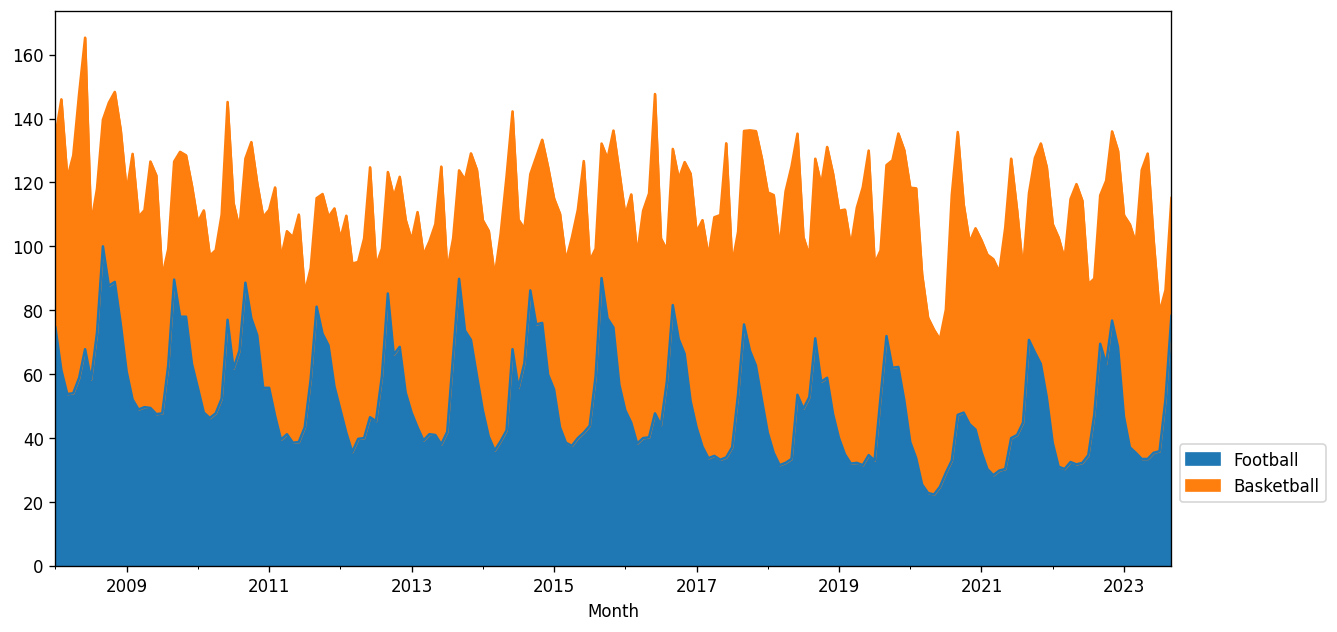

In [ ]:
ax=df.plot.area()
ax.autoscale(axis='x',tight=True)
ax.legend(loc=3,bbox_to_anchor=(1.0,0.1))

In [ ]:
##Splitting tr=into train and test
train= df[0:90]
test=df[90:]
print(train)

            Football  Basketball
Month                           
2008-01-01     74.58       60.05
2008-02-01     61.26       84.78
2008-03-01     53.75       67.66
2008-04-01     54.00       74.46
2008-05-01     58.84       89.13
...              ...         ...
2015-02-01     43.34       66.85
2015-03-01     38.50       57.07
2015-04-01     37.53       65.22
2015-05-01     39.95       71.47
2015-06-01     41.65       85.05

[90 rows x 2 columns]


In [ ]:
print(test)

            Football  Basketball
Month                           
2015-07-01     43.83       51.63
2015-08-01     59.32       39.95
2015-09-01     90.07       42.12
2015-10-01     77.48       50.00
2015-11-01     74.58       61.68
...              ...         ...
2023-05-01     33.41       95.65
2023-06-01     35.35       66.58
2023-07-01     35.84       43.48
2023-08-01     52.06       34.24
2023-09-01     78.21       36.96

[99 rows x 2 columns]


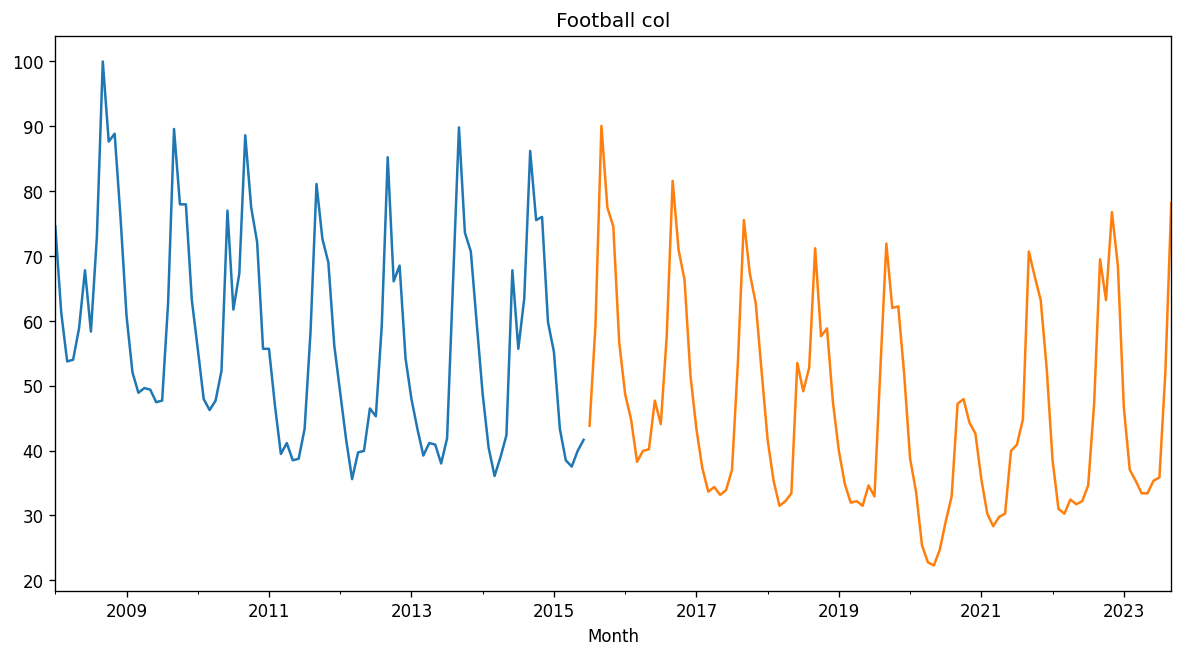

In [ ]:
train.Football.plot(title="Football col")
test.Football.plot(title="Football col")
plt.show()

### NAIVE FORECAST


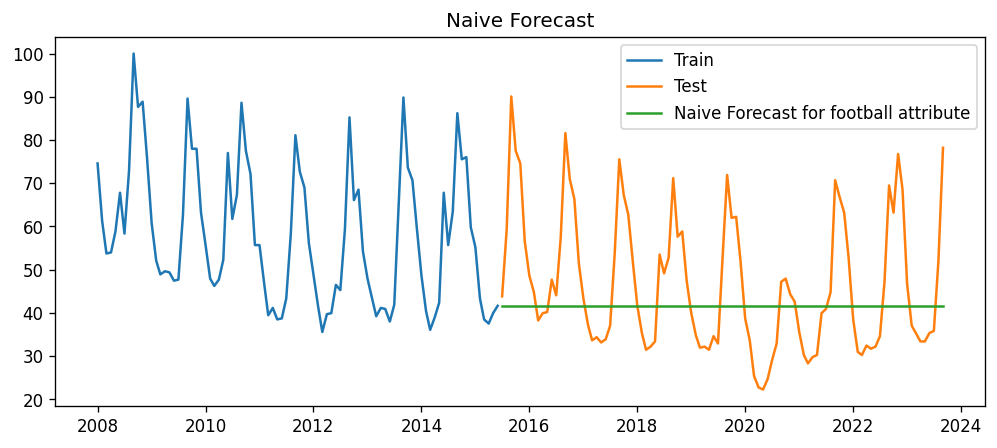

In [ ]:
dd =np.asarray(train.Football)
y_hat = test.copy()
y_hat['naive']= dd[len(dd)-1]
plt.figure(figsize=(10,4))
plt.plot(train.index,train['Football'],label='Train')
plt.plot(test.index,test['Football'],label='Test')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast for football attribute')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

We can infer from the graph that the football league is not stable from say Jan 2016. Many a times we are provided with a dataset, which is stable throughout it’s time period. If we want to forecast the price for the next day, we can simply take the last day value and estimate the same value for the next day. Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.The graph clearly shows that it's not stable for the upcoming days .Hence, the naive method should not be used.

In [ ]:
## Printing RMSE for naive forecast
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive = sqrt(mean_squared_error(test.Football, y_hat.naive))
print(rms_naive)

16.208764401839623


### Simple Average

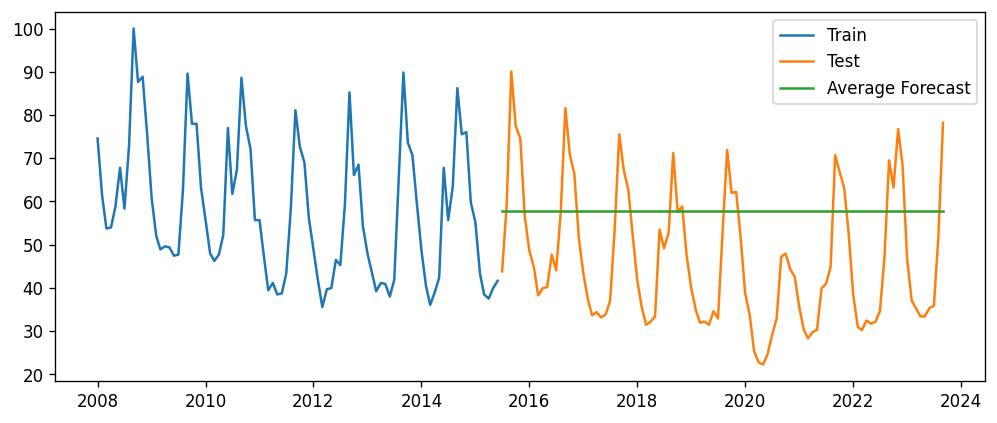

In [ ]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Football'].mean()
plt.figure(figsize=(10,4))
plt.plot(train['Football'], label='Train')
plt.plot(test['Football'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_avg = sqrt(mean_squared_error(test.Football, y_hat_avg.avg_forecast))
print(rms_avg)

19.27520149885725


### Trends of NBA league

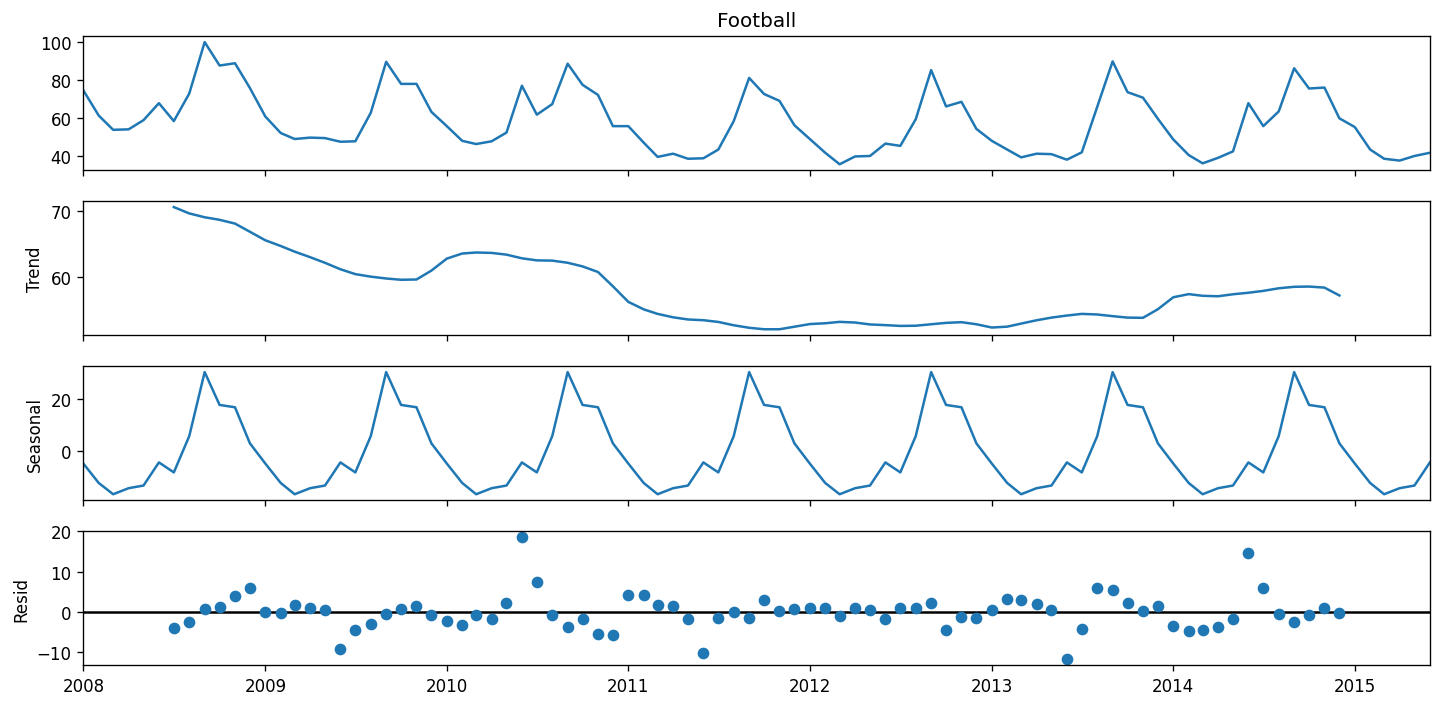

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Football).plot()
result = sm.tsa.stattools.adfuller(train.Football)
plt.show()

### Holt's Linear Trend Model

<ipython-input-74-17be2136ba12>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['Football'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


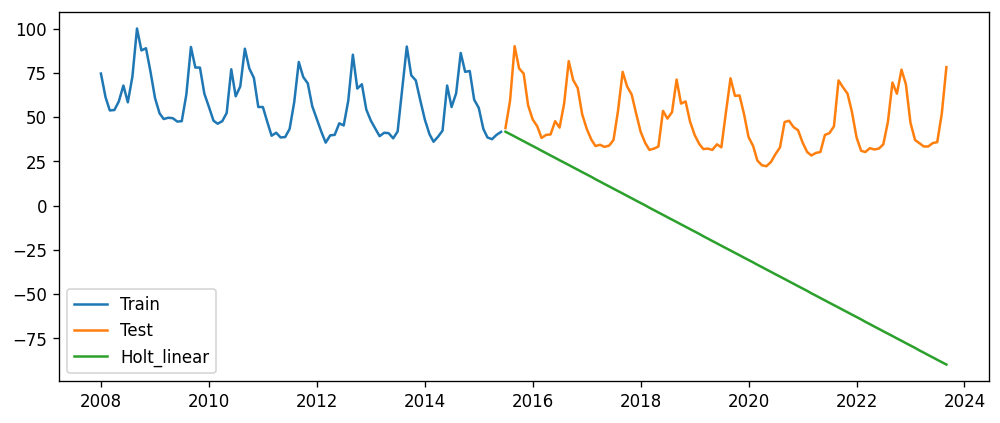

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Football'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(10,4))
plt.plot(train['Football'], label='Train')
plt.plot(test['Football'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

it shows decreasing in the holt linear trend model

In [ ]:
rms_lin = sqrt(mean_squared_error(test.Football, y_hat_avg.Holt_linear))
print(rms_lin)

80.05701631403008


### Sarima model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


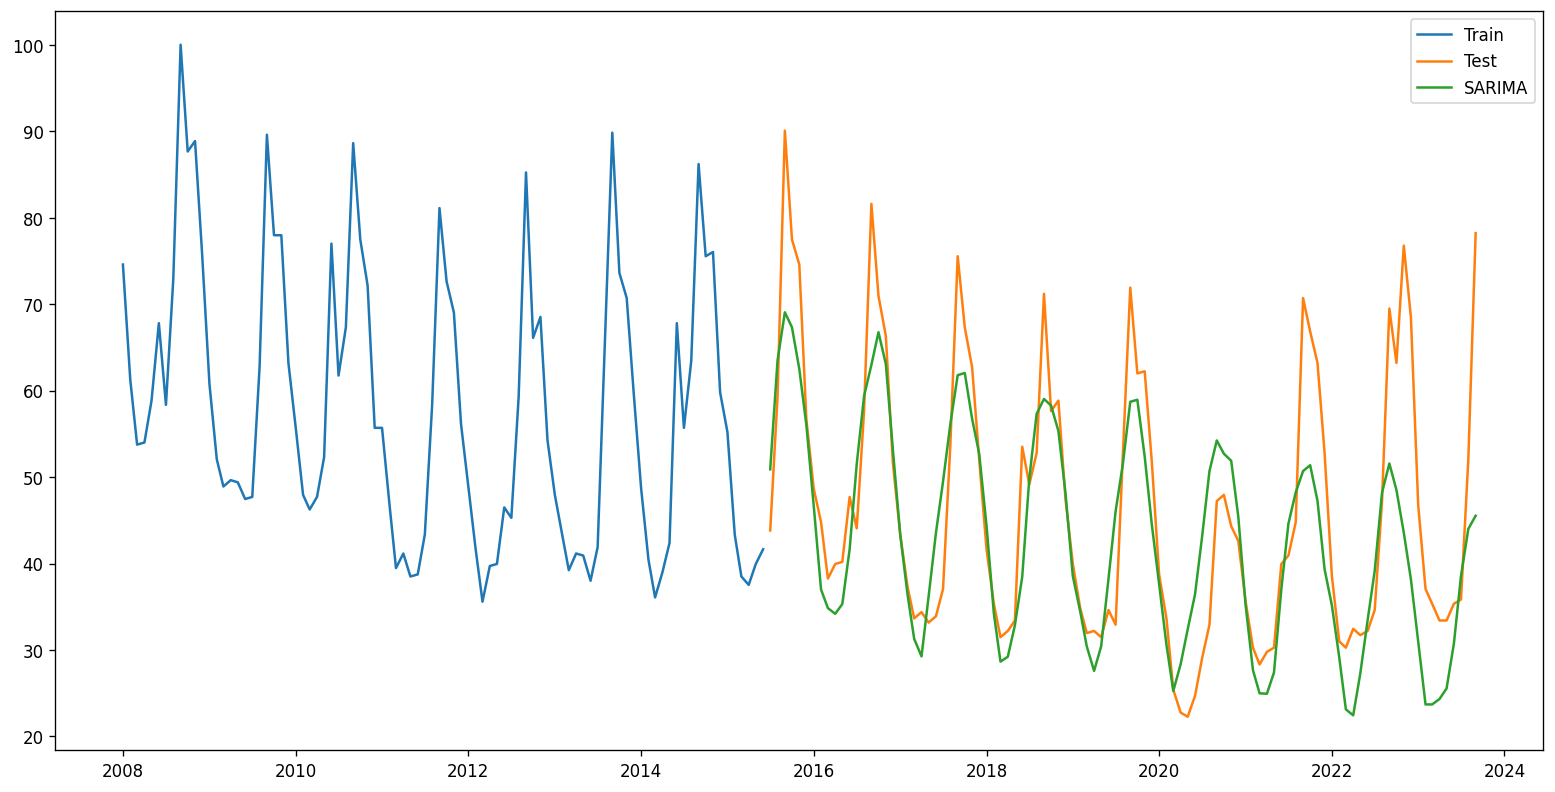

In [ ]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Football, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2015-07-01", end="2023-09-01", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Football'], label='Train')
plt.plot(test['Football'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_sari = sqrt(mean_squared_error(test.Football, y_hat_avg.SARIMA))
print(rms_sari)

9.857550049981327


Although SARIMA Model does perform better than naive method and simple avg model



In [ ]:
from tabulate import tabulate
from tabulate import tabulate_formats
tbl=tabulate([["Naive Method ",rms_naive],["SimpleAvg",rms_avg],["SARIMA",rms_sari]],headers=["Method","RMSE"],tablefmt="rst")
print(tbl)

============  ========
Method            RMSE
============  ========
Naive Method  16.2088
SimpleAvg     19.2752
SARIMA         9.85755
============  ========


### Basketball

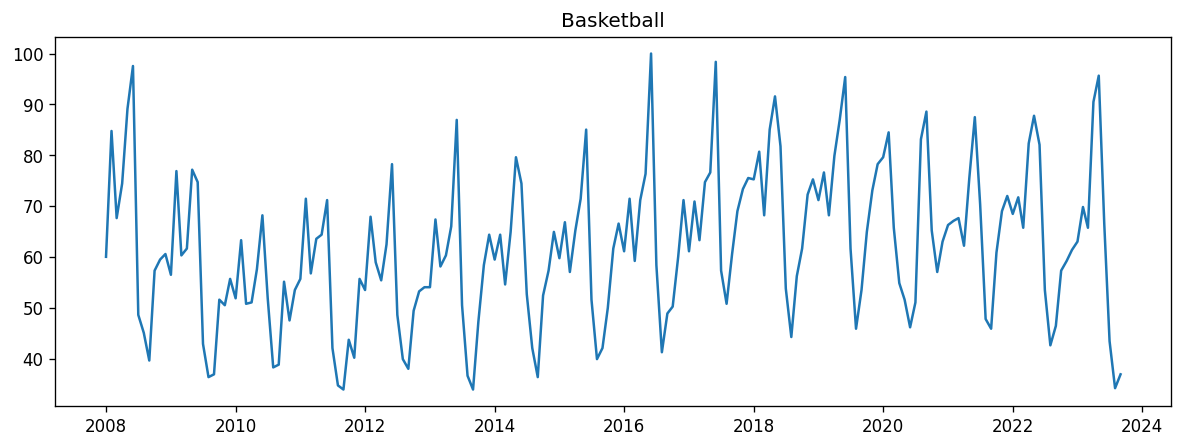

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df['Basketball'], label='Basketball')
plt.title('Basketball')
plt.show()

In [ ]:
result_adf_1 = adfuller(df['Basketball'])
print('ADF Statistic:', result_adf_1[0])
print('p-value:', result_adf_1[1])
print('Critical Values:', result_adf_1[4])

# Perform KPSS test
result_kpss_1 = kpss(df['Basketball'])
print('KPSS Statistic:', result_kpss_1[0])
print('p-value:', result_kpss_1[1])
print('Critical Values:', result_kpss_1[3])

ADF Statistic: -1.1729934839047276
p-value: 0.6851040303720038
Critical Values: {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}
KPSS Statistic: 0.8451716955002864
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-79-29f6079a1fb0>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss_1 = kpss(df['Basketball'])


In [ ]:
if result_adf_1[1] < 0.05 and result_kpss_1[1] > 0.05:
    print('The time series is stationary')
elif result_adf_1[1] >= 0.05 and result_kpss_1[1] < 0.05:
    print('The time series is not stationary')
elif result_adf_1[1] < 0.05 and result_kpss_1[1] < 0.05:
    if result_adf_1[0] < result_kpss_1[0]:
        print('The time series is difference-stationary')
    else:
        print('The time series is trend-stationary')
else:
    print('The test results are inconclusive')

The time series is not stationary


(<Figure size 1200x3264 with 16 Axes>,
 array([<Axes: ylabel='2008'>, <Axes: ylabel='2009'>,
        <Axes: ylabel='2010'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2012'>, <Axes: ylabel='2013'>,
        <Axes: ylabel='2014'>, <Axes: ylabel='2015'>,
        <Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

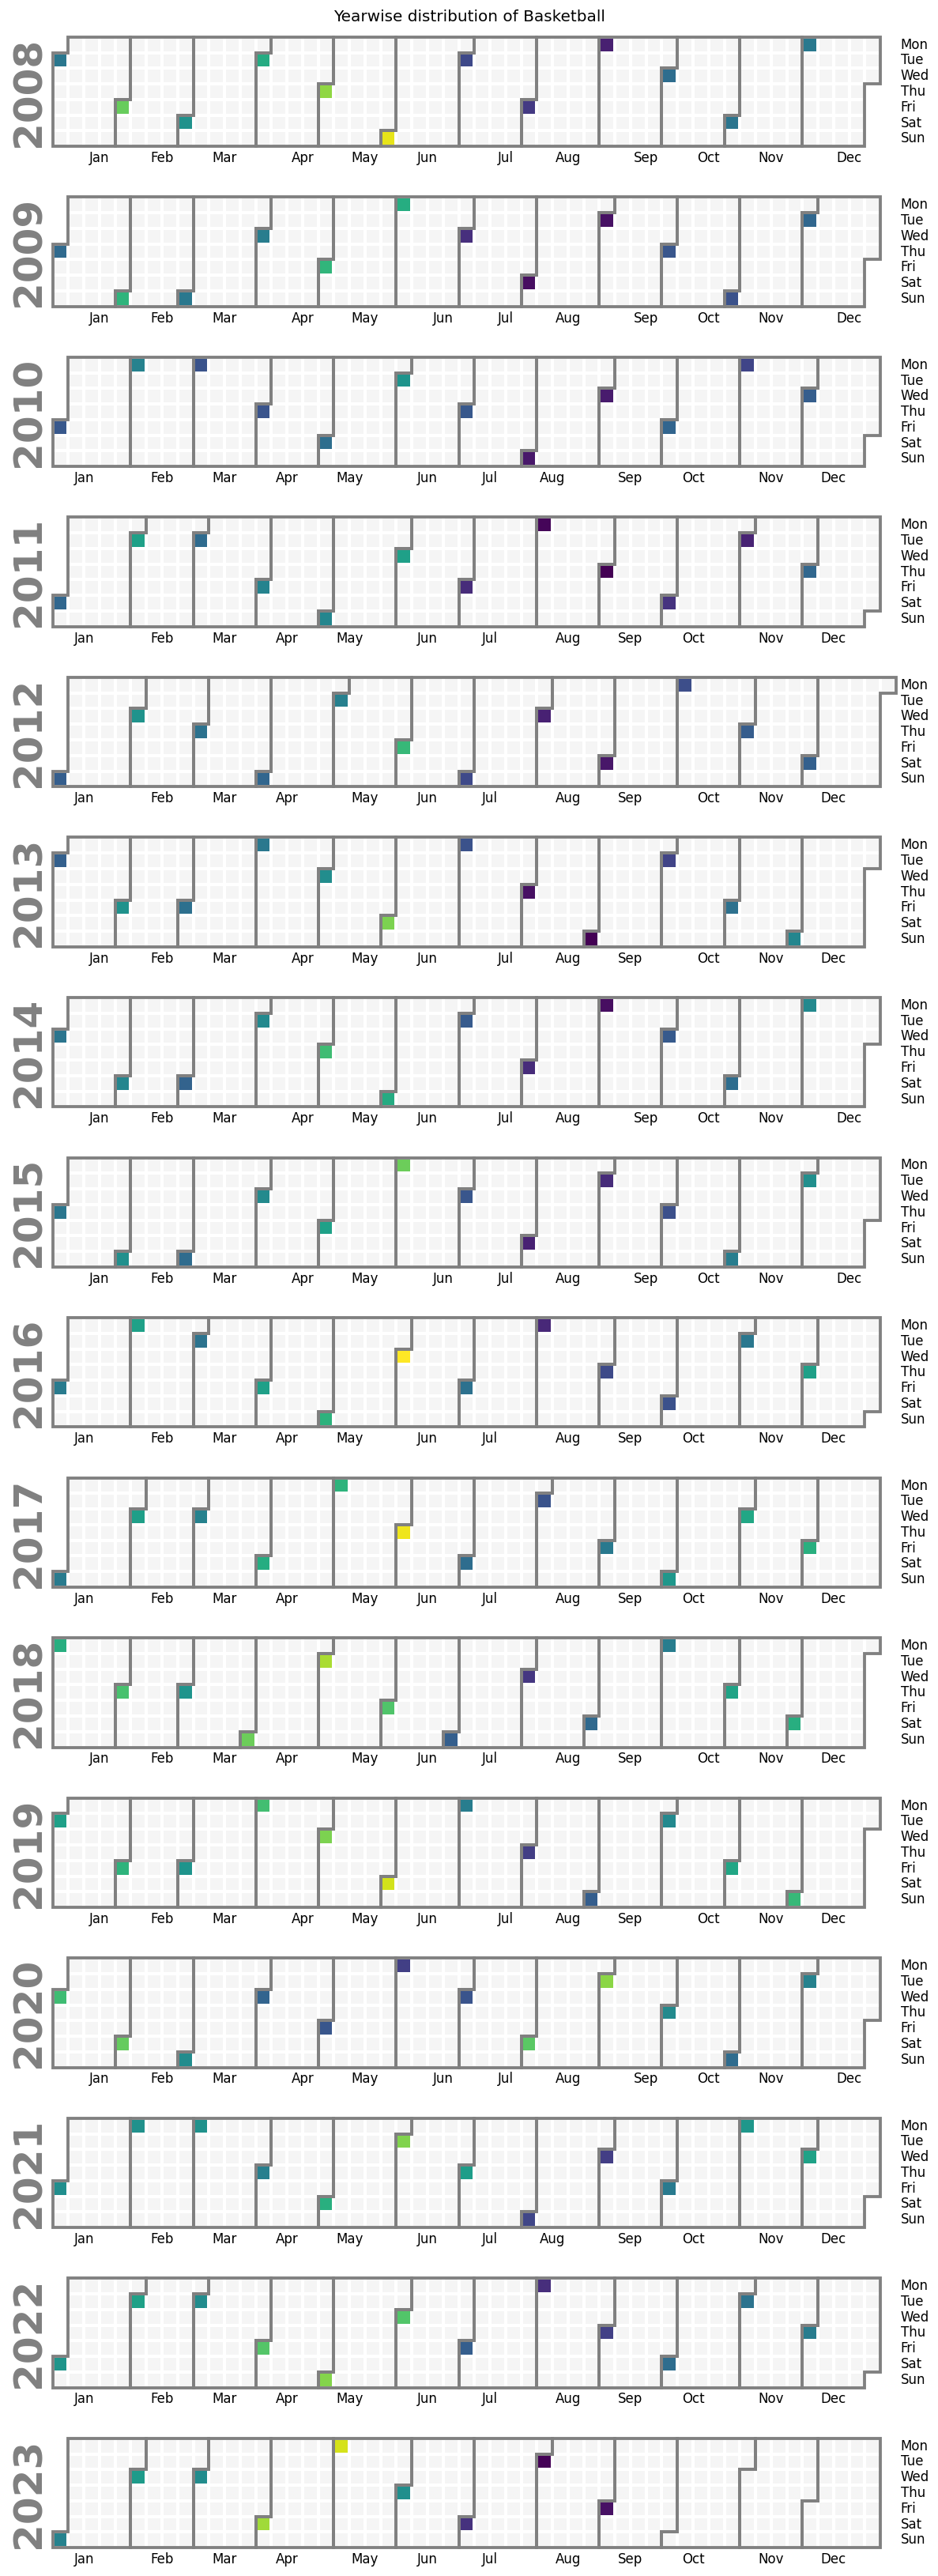

In [ ]:
import calplot
calplot.calplot(df['Basketball'],linewidth = 2.3,colorbar=False,suptitle='Yearwise distribution of Basketball')

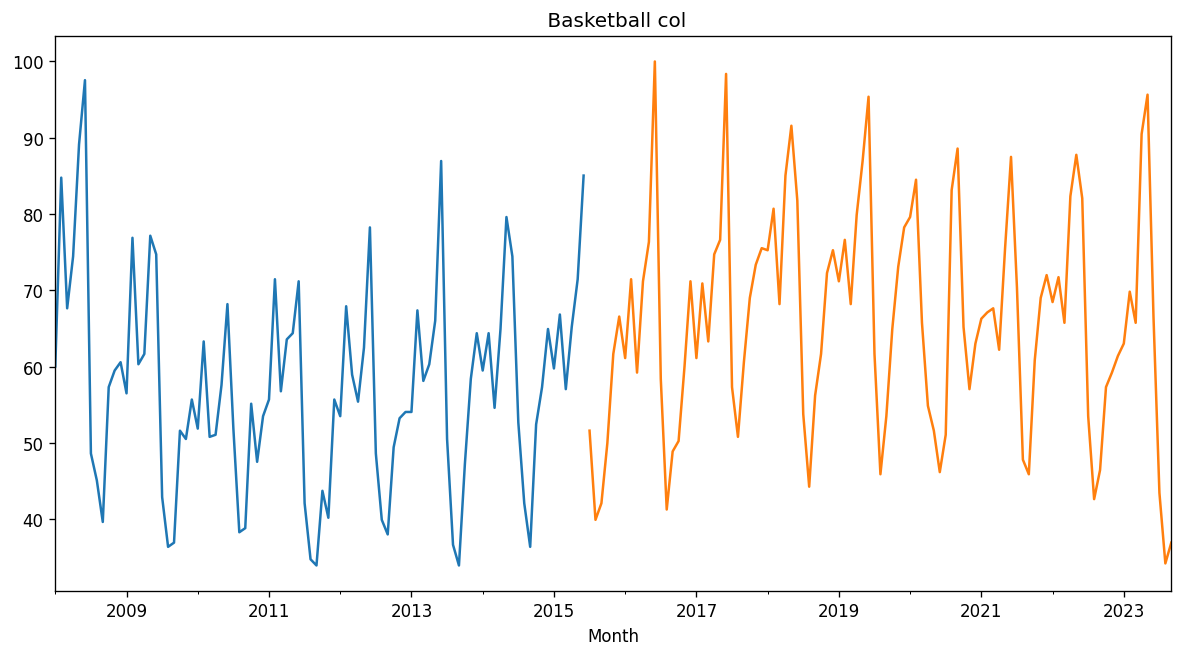

In [ ]:
train.Basketball.plot(title=" Basketball col")
test.Basketball.plot(title=" Basketball col")
plt.show()

### Naive Forecast

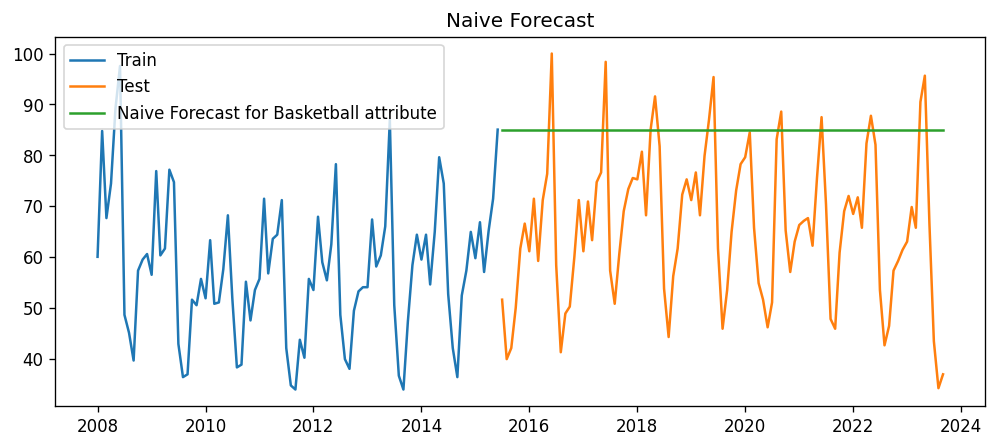

In [ ]:
dd_b = np.asarray(train.Basketball)
y_hat_b = test.copy()
y_hat_b['naive']= dd_b[len(dd_b)-1]
plt.figure(figsize=(10,4))
plt.plot(train.index,train['Basketball'],label='Train')
plt.plot(test.index,test['Basketball'],label='Test')
plt.plot(y_hat_b.index,y_hat_b['naive'],label='Naive Forecast for Basketball attribute')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

We can infer from the graph that the web search count for NBA league is not stable from say july,2015. Many a times we are provided with a dataset, which is stable throughout it’s time period. If we want to forecast the price for the next day, we can simply take the last day value and estimate the same value for the next day. Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.The graph clearly shows that it's not stable for the upcoming days .Hence, the naive method should not be used.

In [ ]:
## Printing RMSE for naive forecast
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_naive_b = sqrt(mean_squared_error(test.Basketball, y_hat_b.naive))
print(rms_naive_b)

23.886291956566705


### Simple Average

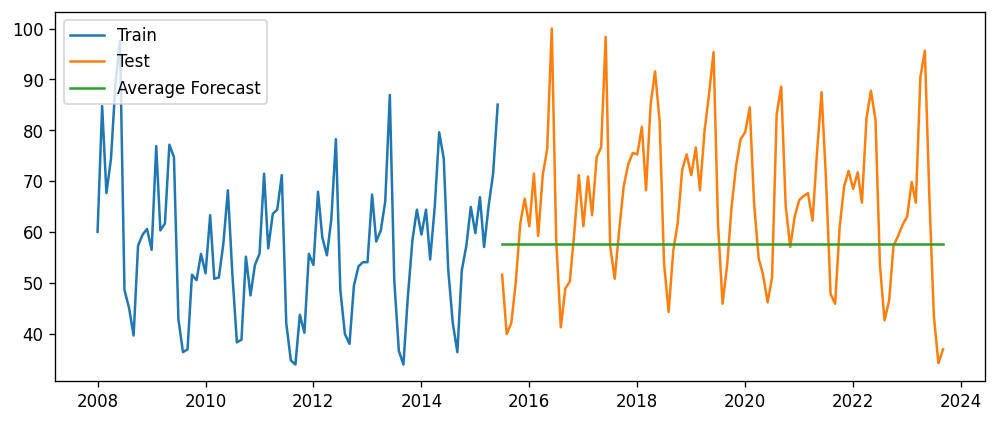

In [ ]:
y_hat_avg_b = test.copy()
y_hat_avg_b['avg_forecast'] = train['Basketball'].mean()
plt.figure(figsize=(10,4))
plt.plot(train['Basketball'], label='Train')
plt.plot(test['Basketball'], label='Test')
plt.plot(y_hat_avg_b['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_avg_b = sqrt(mean_squared_error(test.Basketball, y_hat_avg_b.avg_forecast))
print(rms_avg_b)

16.84748839184511


### Trends of Basketball league

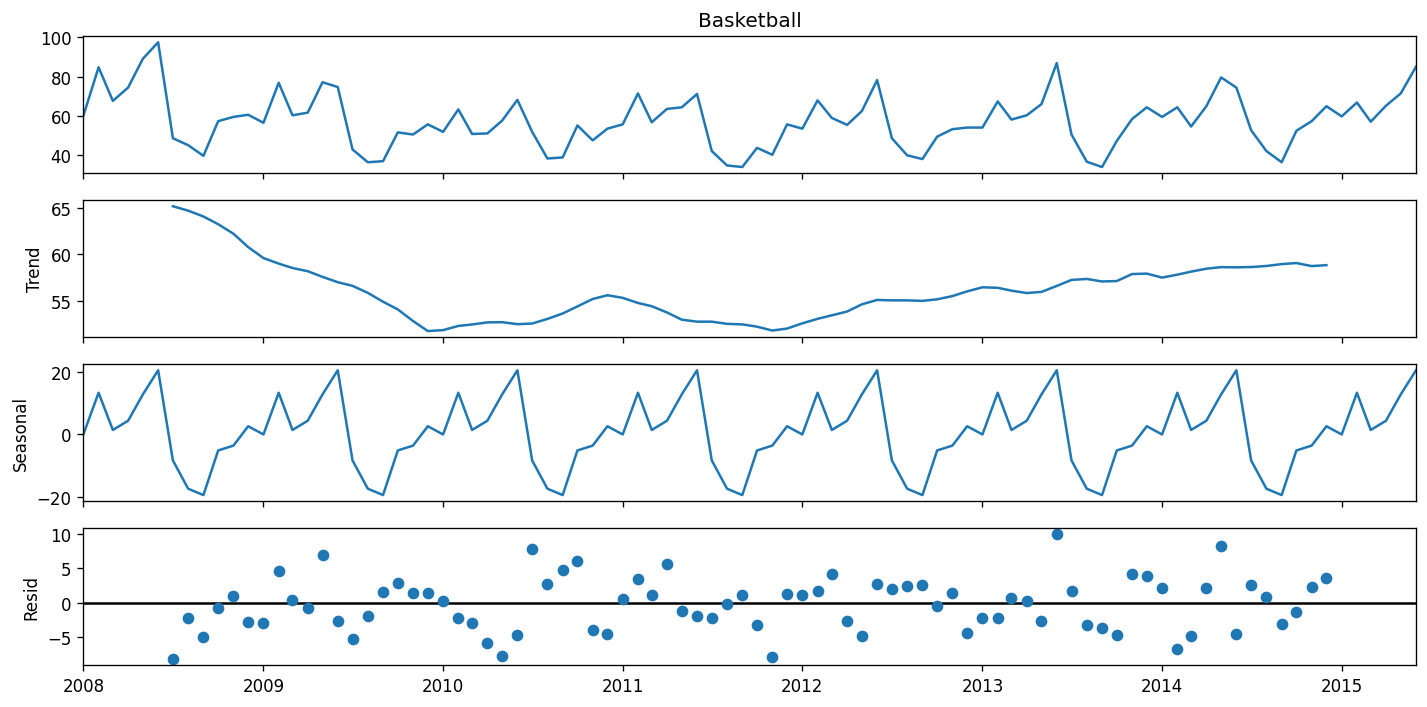

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Basketball).plot()
result_b = sm.tsa.stattools.adfuller(train.Basketball)
plt.show()

### Holt's Linear Trend Model

<ipython-input-94-3adc75e24506>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit11 = Holt(np.asarray(train['Basketball'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


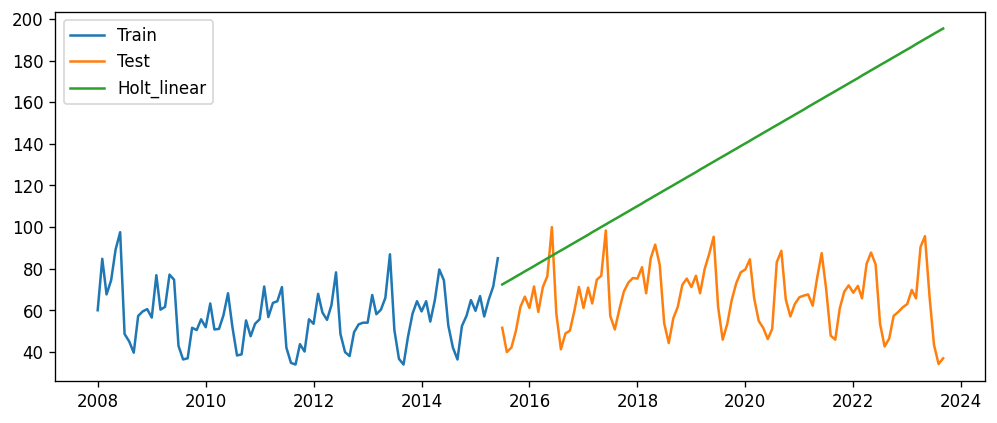

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg_b = test.copy()

fit11 = Holt(np.asarray(train['Basketball'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg_b['Holt_linear'] = fit11.forecast(len(test))

plt.figure(figsize=(10,4))
plt.plot(train['Basketball'], label='Train')
plt.plot(test['Basketball'], label='Test')
plt.plot(y_hat_avg_b['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_lin_b = sqrt(mean_squared_error(test.Basketball, y_hat_avg_b.Holt_linear))
print(rms_lin_b)

78.08641072880516


### SARIMA MODEL

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


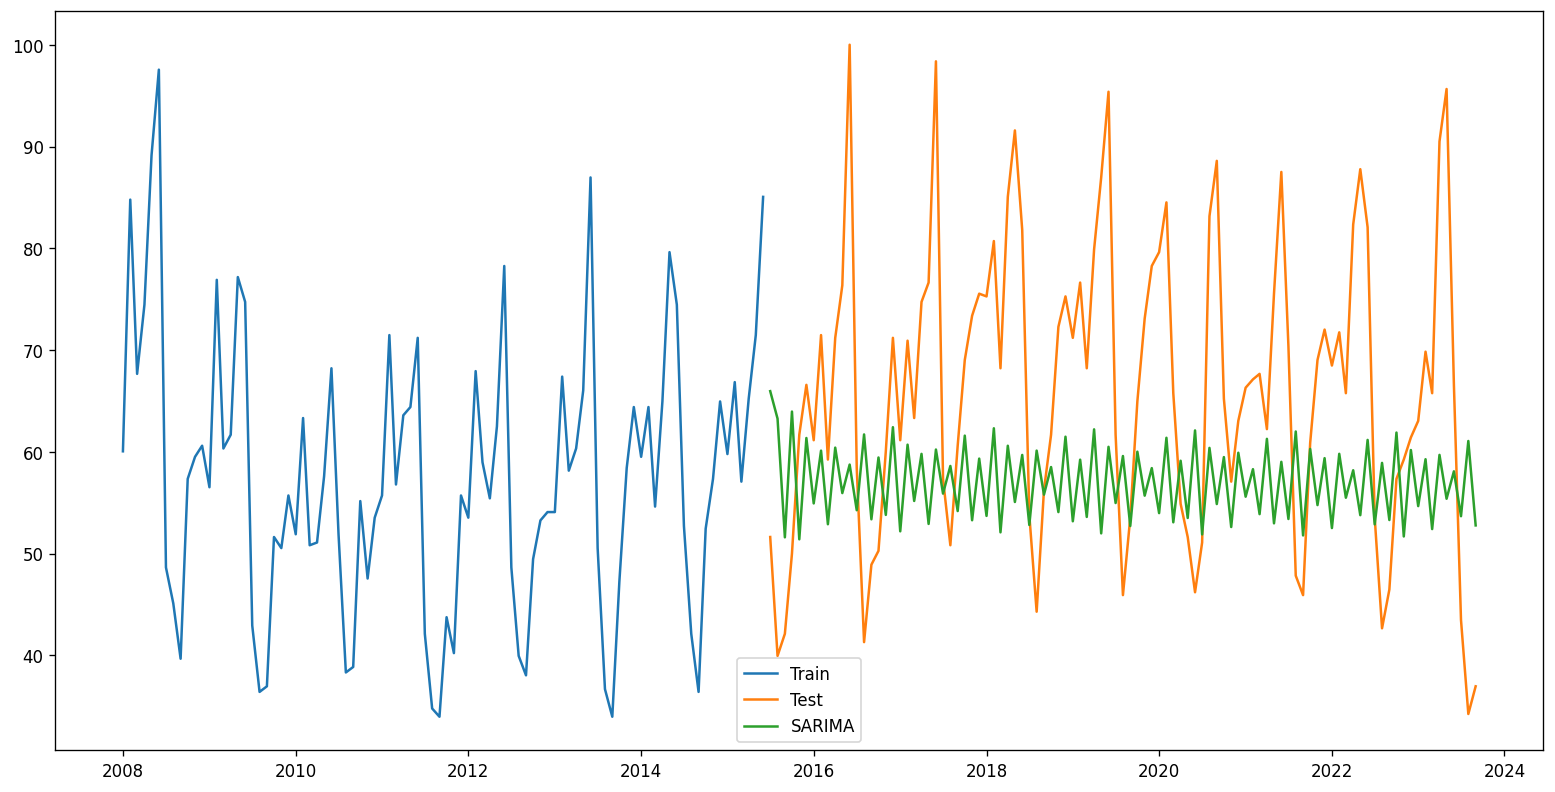

In [ ]:
y_hat_avg_b = test.copy()
fit11 = sm.tsa.statespace.SARIMAX(train.Basketball, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg_b['SARIMA'] = fit11.predict(start="2015-07-01", end="2023-09-01", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Basketball'], label='Train')
plt.plot(test['Basketball'], label='Test')
plt.plot(y_hat_avg_b['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
rms_sari_b = sqrt(mean_squared_error(test.Basketball, y_hat_avg_b.SARIMA))
print(rms_sari_b)

17.254996380423634


In [ ]:
from tabulate import tabulate
from tabulate import tabulate_formats
tb1l=tabulate([["Naive Method ",rms_naive_b],["SimpleAvg",rms_avg_b],["Holts_linear",rms_lin_b],["SARIMA",rms_sari_b]],headers=["Method","RMSE"],tablefmt="rst")
print(tb1l)

============  =======
Method           RMSE
============  =======
Naive Method  23.8863
SimpleAvg     16.8475
Holts_linear  78.0864
SARIMA        17.255
============  =======


Although SARIMA Model does not perform better than simple avg method, it performs better than other models. It can be used to certain datasets where simple avg method or other models fail

### From different graphs , it can be infered that the popularity decreases after certain period.